In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("filled_all_data.csv")

def split_date(r_date):
    if not pd.isna(r_date):
        try:
            year = int(r_date.split('-')[0])
            month = int(r_date.split('-')[1])
            day = int(r_date.split('-')[2].split()[0])
            hour = int(r_date.split('-')[2].split()[1].split(':')[0])
            return year, month, day, hour
        except Exception as e:
            print(e)


# Находим колонки с 'date' в названии
date_columns = [col for col in df.columns if 'date' in col.lower()]

# Применяем функцию к каждой колонке и создаем новые колонки
for col in date_columns:
    df[[f'{col}_year', f'{col}_month', f'{col}_day', f'{col}_hour']] = (
        df[col].apply(split_date).apply(pd.Series))

df['search_period'] = df.apply(lambda x: int(x['search_period'].split()[0]) if not pd.isna(x['search_period']) else x['search_period'], axis=1)


df = df.drop(columns=['date_search', 'date_of_loss', 'last_search_date', 'search_period'])

In [ ]:
plt.style.use('default')
sns.set_palette("husl")
df = df.reset_index(drop=True)

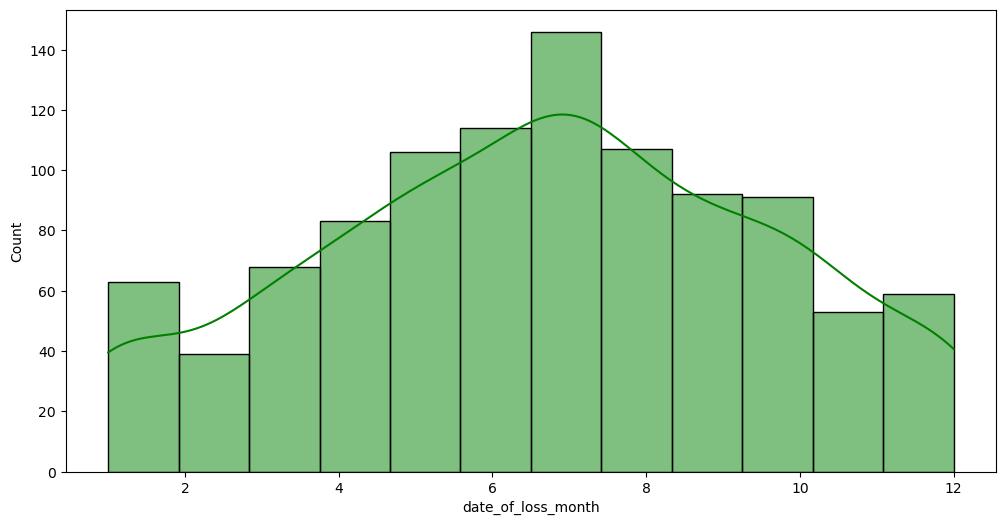

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='date_of_loss_month', bins=12, kde=True, color = 'green', stat = 'count')
plt.show()

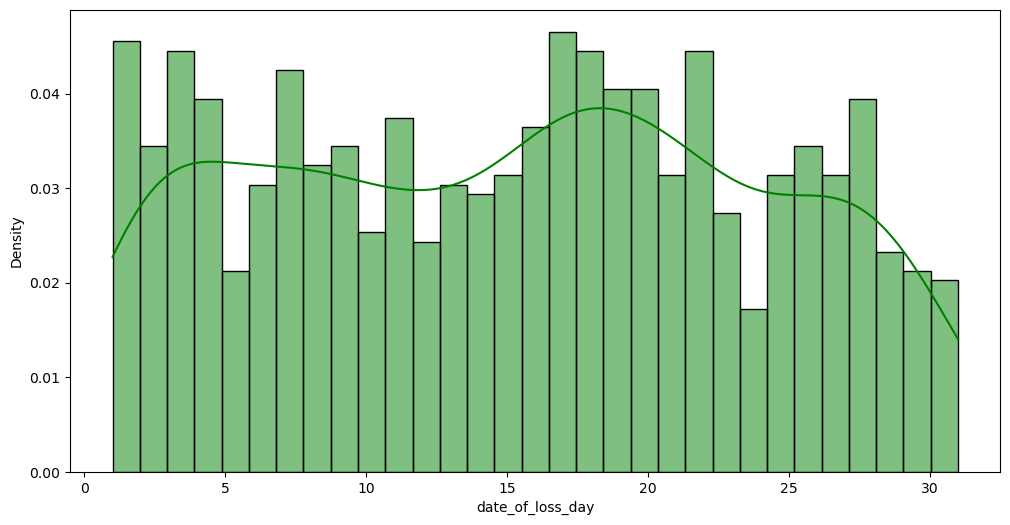

In [16]:


plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='date_of_loss_day', bins=31, kde=True, color = 'green', stat = 'density')
plt.show()

In [26]:
print(len(df['gender']))

19734
